In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
bicycle=pd.read_csv("train.csv",parse_dates=["datetime"])
bicycle.drop(['casual','registered'],axis=1,inplace=True)

In [5]:
# data inspection, 데이터 전처리
bicycle.head()  # 2011~2012 data 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bicycle.dtypes   # datatime 빼고 나머지는 실수 or 정수형을 띰

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [7]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [8]:
bicycle.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

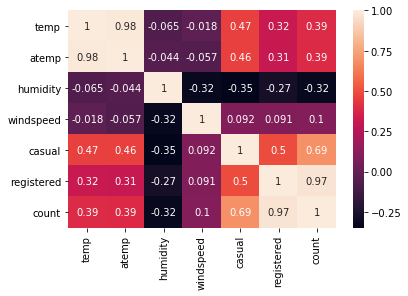

In [9]:
# heatmap으로 상관관계 파악
bicycle1=bicycle[['temp','atemp','humidity','windspeed','count']]
corr=bicycle1.corr(method='pearson') # 연속변수이기 때문에 피어슨 상관관계 이용
sns.heatmap(corr,annot=True)

In [10]:
# data inspection
bicycle['year'] = bicycle['datetime'].dt.year
bicycle['month'] = bicycle['datetime'].dt.month
bicycle['hour'] = bicycle['datetime'].dt.hour
bicycle['weekday'] = bicycle['datetime'].dt.dayofweek

categoryVariableList = ['hour','weekday','month','holiday','workingday','year']
for i in categoryVariableList:
   bicycle[i] = bicycle[i].astype('category')
bicycle.dtypes # 카테고리형으로 변경

bicycle['season']=bicycle.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'}) 
bicycle['weather']=bicycle.weather.map({1:'Clear',2:'Mist',3:'Light_Rain',4:'Heavy_rain'}) 
bicycle['weekday']=bicycle.weekday.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday', 5:'Saturday',6:'Sunday'}) 

In [11]:
bicycleym = bicycle.copy()

bicycle.drop(['datetime','atemp'],axis=1,inplace=True) 

In [12]:
bicycle.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour,weekday
0,Spring,0,0,Clear,9.84,81,0.0,16,2011,1,0,Saturday
1,Spring,0,0,Clear,9.02,80,0.0,40,2011,1,1,Saturday
2,Spring,0,0,Clear,9.02,80,0.0,32,2011,1,2,Saturday
3,Spring,0,0,Clear,9.84,75,0.0,13,2011,1,3,Saturday
4,Spring,0,0,Clear,9.84,75,0.0,1,2011,1,4,Saturday


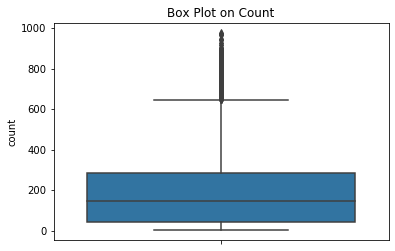

In [13]:
### 시각화
## count boxplot
sns.boxplot(data = bicycle, y = "count")
plt.title('Box Plot on Count')
plt.show()

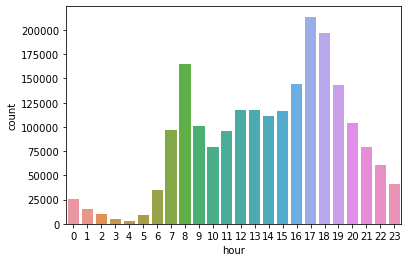

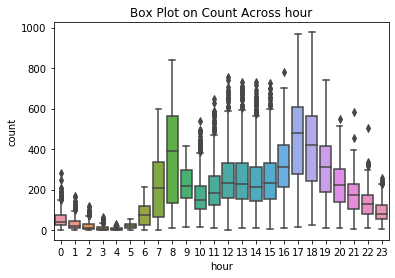

In [19]:
## hour / count
group_hour = bicycle.groupby(['hour'])['count'].sum().reset_index()
ax = sns.barplot(x = group_hour['hour'], y = group_hour['count'])
ax.set(xlabel = 'hour', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "hour", orient="v")
plt.title('Box Plot on Count Across hour')
plt.show()

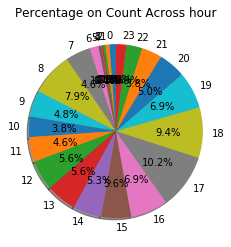

In [20]:
plt.pie(group_hour['count'],
        labels=group_hour['hour'],
        startangle=90,
        shadow= True,
        autopct='%1.1f%%'
        )
plt.title('Percentage on Count Across hour')
plt.show()

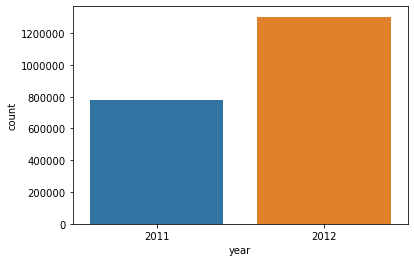

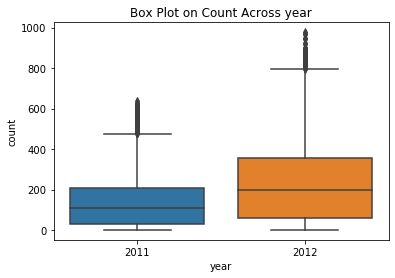

In [21]:
## year / count
group_year = bicycle.groupby(['year'])['count'].sum().reset_index()
ax = sns.barplot(x = group_year['year'], y = group_year['count'])
ax.set(xlabel = 'year', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "year", orient="v")
plt.title('Box Plot on Count Across year')
plt.show()

# 2012년에 더 증가했다.

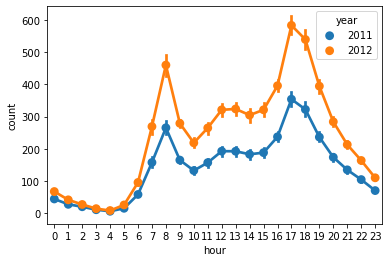

In [22]:
# 연도별 시간별 
sns.pointplot(data = bicycle, x = "hour", y = "count", hue = "year")

# 아침과 오후에 높다.

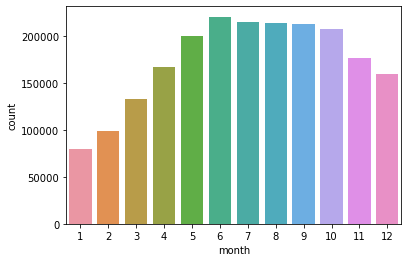

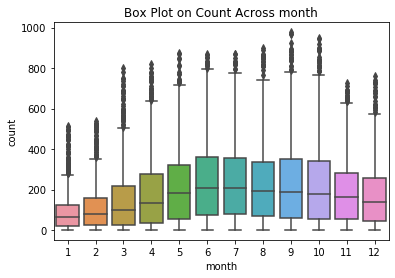

In [23]:
## month / count 
group_month = bicycle.groupby(['month'])['count'].sum().reset_index()
ax = sns.barplot(x = group_month['month'], y = group_month['count'])
ax.set(xlabel = 'month', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "month", orient="v")
plt.title('Box Plot on Count Across month')
plt.show()

# 6월~10월이 count가 높다.

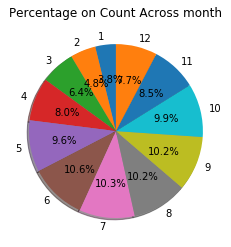

In [24]:
plt.pie(group_month['count'],
        labels=group_month['month'],
        startangle=90,
        shadow= True,
        autopct='%1.1f%%'
        )
plt.title('Percentage on Count Across month')
plt.show()

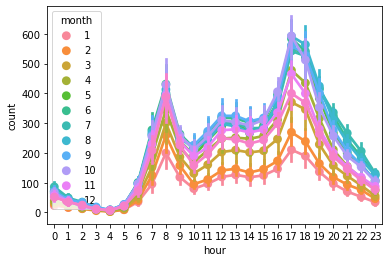

In [25]:
# 월별 시간별
sns.pointplot(data = bicycle, x = "hour", y = "count", hue = "month")

# 월별로 차이가 있지만 하루에 패턴은 동일

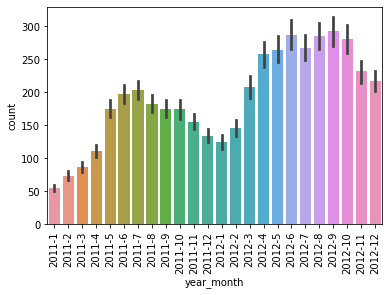

In [26]:
## year_month / count
def y_m(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

bicycleym["year_month"] = bicycleym["datetime"].apply(y_m)

sns.barplot(data=bicycleym, x="year_month", y="count")
plt.xticks(rotation=90)
plt.show()

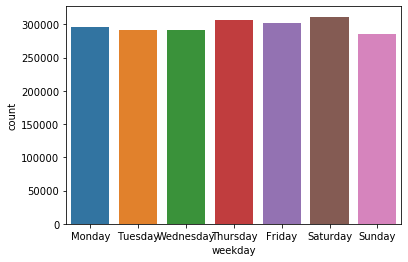

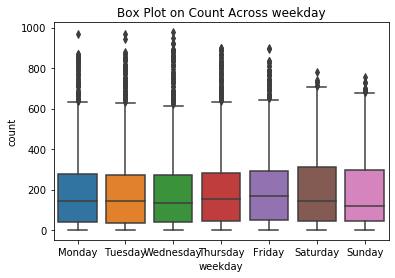

In [27]:
## weekday / count
bicycle_weekday = bicycle.groupby(['weekday'])['count'].sum()
group_weekday = pd.DataFrame(bicycle_weekday,index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax = sns.barplot(x = group_weekday.index, y = group_weekday['count'])
ax.set(xlabel = 'weekday', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "weekday", orient="v",order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Box Plot on Count Across weekday')
plt.show()

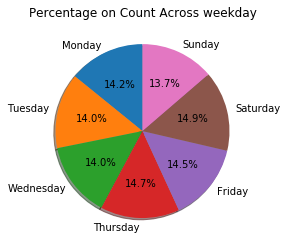

In [28]:
plt.pie(group_weekday['count'],
        labels=group_weekday.index,
        startangle=90,
        shadow= True,
        autopct='%1.1f%%'
        )
plt.title('Percentage on Count Across weekday')
plt.show()

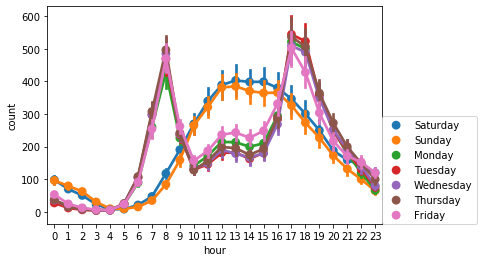

In [29]:
# 요일별 시간별 
sns.pointplot(data = bicycle, x = "hour", y = "count", hue = "weekday")
plt.legend(loc=(1,0))

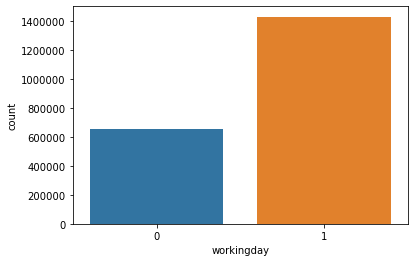

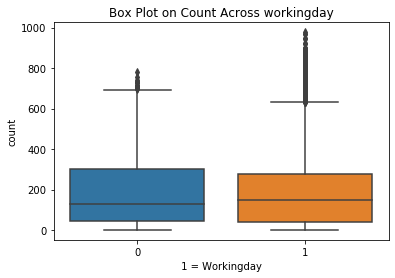

In [30]:
## workingday / count
group_workingday = bicycle.groupby(['workingday'])['count'].sum().reset_index()
ax = sns.barplot(x = group_workingday['workingday'], y = group_workingday['count'])
ax.set(xlabel = 'workingday', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "workingday", orient="v")
plt.title('Box Plot on Count Across workingday')
plt.xlabel(" 1 = Workingday ")
plt.show()

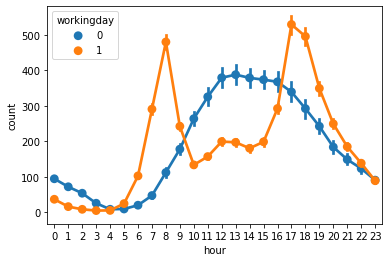

In [31]:
# workingday 시간별 
sns.pointplot(data = bicycle, x = "hour", y = "count", hue = "workingday")

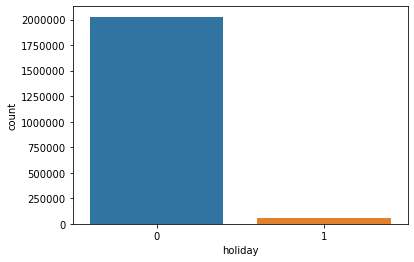

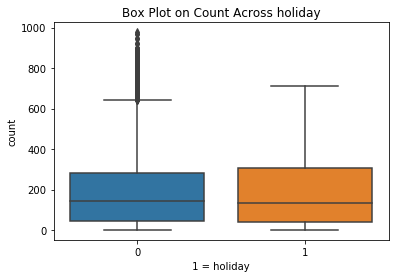

In [32]:
## holiday / count
group_holiday = bicycle.groupby(['holiday'])['count'].sum().reset_index()
ax = sns.barplot(x = group_holiday['holiday'], y = group_holiday['count'])
ax.set(xlabel = 'holiday', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "holiday", orient="v")
plt.title('Box Plot on Count Across holiday')
plt.xlabel(" 1 = holiday ")
plt.show()

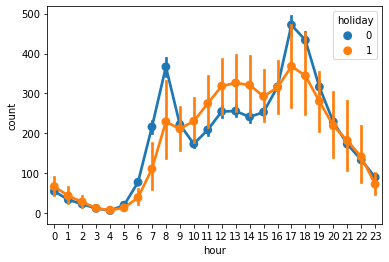

In [33]:
# holiday 시간별 
sns.pointplot(data = bicycle, x = "hour", y = "count", hue = "holiday")

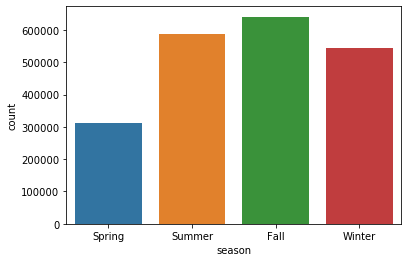

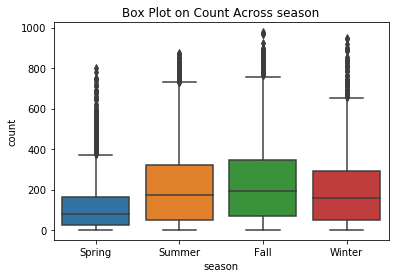

In [34]:
## season / count
bicycle_season = bicycle.groupby(['season'])['count'].sum()
group_season = pd.DataFrame(bicycle_season,index=['Spring','Summer','Fall','Winter'])
ax = sns.barplot(x = group_season.index, y = group_season['count'])
ax.set(xlabel = 'season', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "season", orient="v")
plt.title('Box Plot on Count Across season')
plt.show()

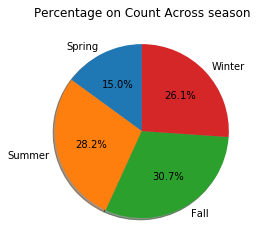

In [35]:
plt.pie(group_season['count'],
        labels=group_season.index,
        startangle=90,
        shadow= True,
        autopct='%1.1f%%'
        )
plt.title('Percentage on Count Across season')
plt.show()

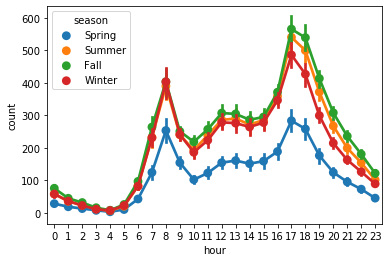

In [36]:
# 계절별 시간별 
sns.pointplot(data = bicycle, x = "hour", y = "count", hue = "season")

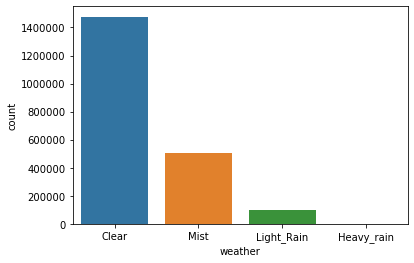

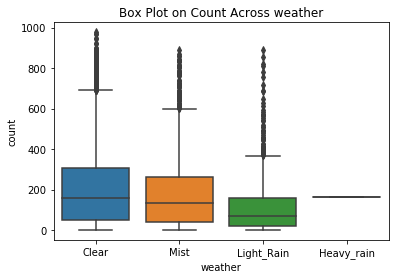

In [37]:
## weather / count
bicycle_weather = bicycle.groupby(['weather'])['count'].sum()
group_weather = pd.DataFrame(bicycle_weather,index=['Clear','Mist','Light_Rain','Heavy_rain'])
ax = sns.barplot(x = group_weather.index, y = group_weather['count'])
ax.set(xlabel = 'weather', ylabel = 'count')
plt.show()

sns.boxplot(data = bicycle, y = "count", x = "weather", orient="v")
plt.title('Box Plot on Count Across weather')
plt.show()

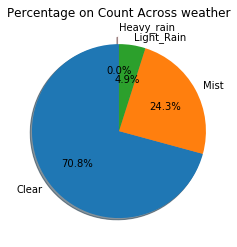

In [38]:
plt.pie(group_weather['count'],
        labels=group_weather.index,
        startangle=90,
        shadow= True,
        autopct='%1.1f%%',
        explode=(0,0,0,0.1)
        )
plt.title('Percentage on Count Across weather')
plt.show()

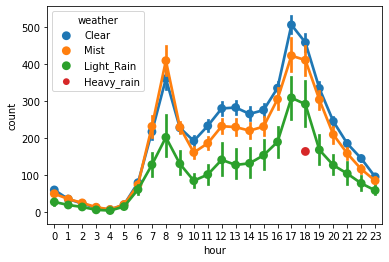

In [39]:
# 날씨별 시간별 
sns.pointplot(data = bicycle, x = "hour", y = "count", hue = "weather")

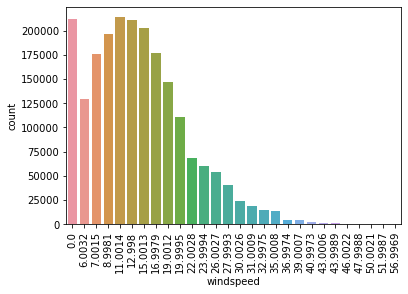

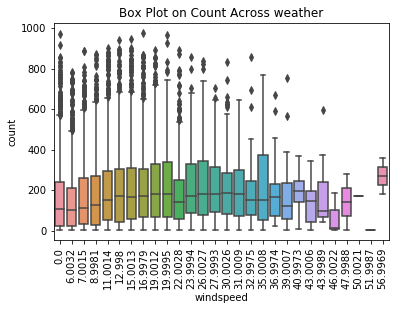

In [23]:
## windspeed / count
group_windspeed = bicycle.groupby(['windspeed'])['count'].sum().reset_index()
ax = sns.barplot(x = group_windspeed['windspeed'], y = group_windspeed['count'])
ax.set(xlabel = 'windspeed', ylabel = 'count')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data = bicycle, y = 'count', x = "windspeed", orient="v")
plt.title('Box Plot on Count Across weather')
plt.xticks(rotation=90)
plt.show()

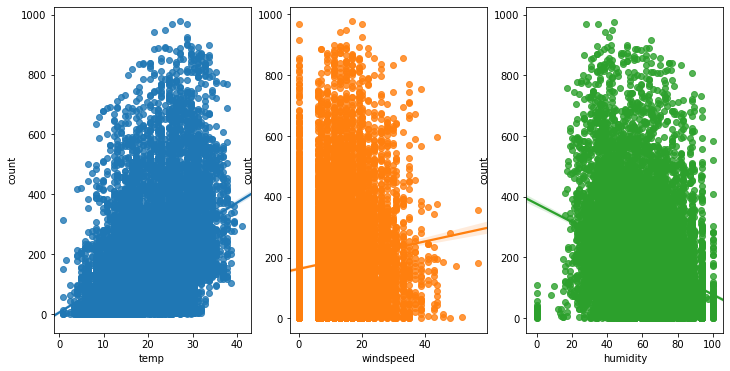

In [40]:
## temp, windspeed, humidity / count
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 6)

sns.regplot(x = "temp", y = "count", data = bicycle, ax = ax1)

sns.regplot(x = "windspeed", y = "count", data = bicycle, ax = ax2)

sns.regplot(x = "humidity", y = "count", data = bicycle, ax = ax3)

In [41]:
bicycle_dummy = pd.get_dummies(bicycle[['season','holiday','workingday','weather','year','month','hour','weekday']])
bicycle_con = bicycle[['temp','humidity','windspeed','count']]
bicycle1 = pd.concat([bicycle_con,bicycle_dummy],axis=1)

In [42]:
bicycle1.head()

,temp,humidity,windspeed,count,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,holiday_1,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,9.84,81,0.0,16,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,9.02,80,0.0,40,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,9.02,80,0.0,32,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,9.84,75,0.0,13,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,9.84,75,0.0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [43]:
### Modeling

# train data split
from sklearn.model_selection import train_test_split
train,test = train_test_split(bicycle1, test_size = .3, train_size = .7, random_state = 0)

# train에서 outlier 제거하기, test는 변경 불가능하므로 그대로 두기
train_woOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(train_woOutliers.shape)   #outlier 제거 후 남은 데이터

(7620, 61)
(7510, 61)


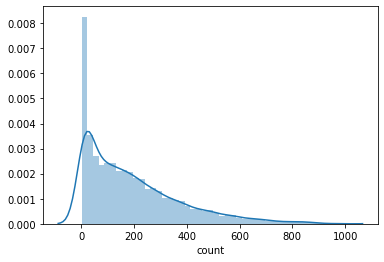

In [44]:
train = train_woOutliers   # 변경 확인 후 원래의 train데이터를 outlier 수정본으로 바꿈

# outlier 제거 후 count 조정
sns.distplot(bicycle1['count'])

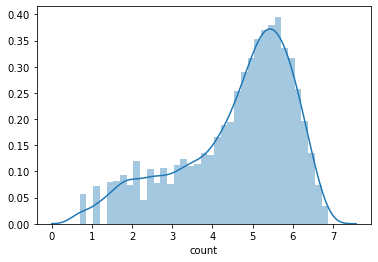

In [45]:
bicycle1['count']=np.log1p(bicycle1['count'])  # log(1+x) 정규화
sns.distplot(bicycle1['count'])   # less tilted

In [46]:
# 데이터에서 예측해야 하는 y값 분리
y_train = train['count']
X_train = train.drop('count',axis=1)

y_test = test['count']
X_test = test.drop('count',axis=1)

In [47]:
## 선형 회귀(최소제곱법=OLS(ordinary least squares))
# 선형 회귀는 평균제곱오차(mean squared error)를 최소화하는 파라미터 w와 b를 찾는다.
# MSE = 1/N * sigma(yi - yi hat)^2
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [48]:
# 기울기 파라미터(w)는 가중치(weight) 또는 계수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있다.
# 편향(offset) 또는 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장되어 있다.
print('lr.coef_ : ', lr.coef_)
print('lr.intercept_ : ', lr.intercept_)

lr.coef_ :  [ 4.78436346e+00 -7.10675174e-01 -6.49003958e-01  1.26444650e+12
  1.12222595e+12  2.07990627e+12 -2.43587364e+12  9.40940392e+10
  3.38248332e+09  1.49775084e+11  5.90635279e+10  1.95872144e+11
  1.95872144e+11  1.95872144e+11  1.95872144e+11 -3.59558648e+10
 -3.59558647e+10 -5.23283613e+11 -5.23283613e+11 -5.23283613e+11
 -1.48096393e+12 -1.48096393e+12 -1.48096393e+12 -6.65504167e+11
 -6.65504167e+11 -6.65504167e+11  3.03481597e+12  3.03481597e+12
  3.03481597e+12  8.34671300e+10  8.34671300e+10  8.34671300e+10
  8.34671300e+10  8.34671300e+10  8.34671300e+10  8.34671300e+10
  8.34671302e+10  8.34671303e+10  8.34671302e+10  8.34671301e+10
  8.34671301e+10  8.34671302e+10  8.34671302e+10  8.34671302e+10
  8.34671302e+10  8.34671302e+10  8.34671304e+10  8.34671303e+10
  8.34671303e+10  8.34671302e+10  8.34671301e+10  8.34671301e+10
  8.34671300e+10  9.88657990e+10  9.88657990e+10  8.15424308e+09
  8.15424306e+09  9.88657990e+10  9.88657990e+10  9.88657990e+10]
lr.intercept

In [49]:
print('훈련 세트 점수 : {:.3f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(lr.score(X_test,y_test)))

훈련 세트 점수 : 0.686
테스트 세트 점수 : 0.678


In [50]:
"""
리지 회귀 : 회귀를 위한 선형 모델 -> 최소적합법과 같은 예측 함수 사용
가중치(w) 선택은 훈련 데이터를 잘 예측하는 것 뿐만 아니라 추가 제약 조건을 만족시키기 위함
가중치의 절대값을 가능한 작게 만든다.(=w의 모든 원소가 0에 가깝게 만든다.) 모든 특성이 출력에 주는 영향을 최소한으로 만들기 위해
-> regularization(규제) : 과대적합이 되지 않도록 모델을 강제로 제한(리지 회귀에서의 규제 방식을 L2 규제라고 말함)
"""
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print('훈련 세트 점수 : {:.3f}'.format(ridge.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(ridge.score(X_test,y_test)))

훈련 세트 점수 : 0.686
테스트 세트 점수 : 0.678


In [51]:
# Ridge는 모델을 단순하게(계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 차이를 절충할 방법 제공
# -> alpha 매개변수 : alpha 값을 높이면 계수를 0에 더 가깝게 만들어 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다.
# alpha 값을 무엇으로 할 지는 데이터 세트에 따라 다르다. 
ridge10 = Ridge(alpha=10).fit(X_train,y_train) # default = 1
print('훈련 세트 점수 : {:.3f}'.format(ridge10.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(ridge10.score(X_test,y_test)))
# alpha 값이 0에 가까운 작은 수가 된다 -> 계수를 거의 제한하지 않는 선형회귀 모델과 거의 같아진다.

훈련 세트 점수 : 0.685
테스트 세트 점수 : 0.676


In [52]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print('훈련 세트 점수 : {:.3f}'.format(ridge01.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(ridge01.score(X_test,y_test)))

훈련 세트 점수 : 0.686
테스트 세트 점수 : 0.678


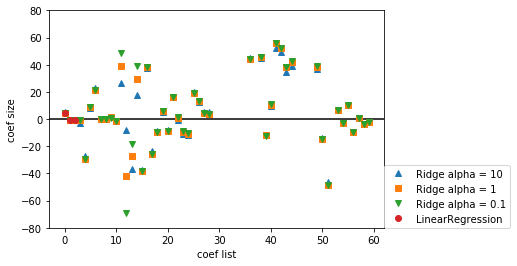

In [53]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha = 10')
plt.plot(ridge.coef_, 's', label='Ridge alpha = 1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha = 0.1')


plt.plot(lr.coef_, 'o', label = 'LinearRegression')
plt.xlabel('coef list')
plt.ylabel('coef size')
xlims = plt.xlim()
plt.hlines(0,xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-80,80)
plt.legend(loc=(1,0))

In [54]:
# 라소 회귀
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(lasso.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(lasso.score(X_test,y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.658
테스트 세트 점수 : 0.649
사용한 특성의 개수 :  34


In [55]:
# 훈련 세트와 테스트 세트 모두 결과가 좋지 못함.
# -> 과소적합(11개 특성 중 7개만 사용)
# 과소적합을 줄이기 위해 alpha를 사용
# -> max_iter(반복실행하는 최대 횟수)의 기본값을 늘림

# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train,y_train)
print('훈련 세트 점수 : {:.3f}'.format(lasso001.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(lasso001.score(X_test,y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso001.coef_ != 0))
# alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련 세트와 테스트 세트에서의 성능이 좋아진다.
# 성능은 리지보다 조금 나은데 사용한 특성의 수가 적어서 모델을 분석하기가 조금 더 쉽다.
# alpha 값이 너무 낮으면 규제의 효과가 없어져 과대적합이 된다. -> LinearRegression의 결과와 비슷해진다.

훈련 세트 점수 : 0.686
테스트 세트 점수 : 0.678
사용한 특성의 개수 :  55


In [56]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print('훈련 세트 점수 : {:.3f}'.format(lasso00001.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(lasso00001.score(X_test,y_test)))
print('사용한 특성의 개수 : ', np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.686
테스트 세트 점수 : 0.678
사용한 특성의 개수 :  56


'\n보통은 리지 회귀를 선호. 특성이 많고 일부만 필요하다면 Lasso가 더 좋은 선택\nscikit-learn에서 Lasso와 Ridge 패널티를 결합한 ElasticNet 제공 -> 매개변수 두 개 조정\n'

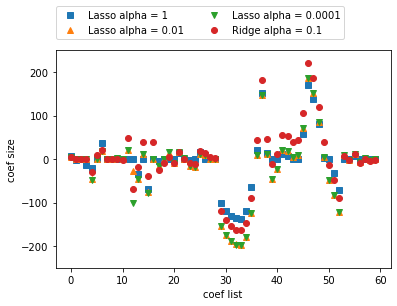

In [57]:
plt.plot(lasso.coef_, 's', label='Lasso alpha = 1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha = 0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha = 0.0001')

plt.plot(ridge01.coef_,'o',label='Ridge alpha = 0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-250,250)
plt.xlabel('coef list')
plt.ylabel('coef size')
'''
보통은 리지 회귀를 선호. 특성이 많고 일부만 필요하다면 Lasso가 더 좋은 선택
scikit-learn에서 Lasso와 Ridge 패널티를 결합한 ElasticNet 제공 -> 매개변수 두 개 조정
'''

In [58]:
# 결정 트리
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(tree.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(tree.score(X_test,y_test)))

훈련 세트 점수 : 0.999
테스트 세트 점수 : 0.026


In [59]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 0)
tree.fit(X_train, y_train)
print('훈련 세트 점수 : {:.3f}'.format(tree.score(X_train,y_train)))
print('테스트 세트 점수 : {:.3f}'.format(tree.score(X_test,y_test)))
# 결과 좋지 못함

훈련 세트 점수 : 0.036
테스트 세트 점수 : 0.015


In [60]:
# 배깅 : 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 5, n_jobs = -1, oob_score = True, random_state = 42)
bagging.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(bagging.score(X_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(bagging.score(X_test,y_test)))
print('OOB 샘플의 정확도 : {:.3f}'.format(bagging.oob_score_))
# OOB : out of bag -> oob_score = True : 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가

훈련 세트 정확도 : 0.925
테스트 세트 정확도 : 0.024
OOB 샘플의 정확도 : 0.025


In [96]:
# 랜덤 포레스트
# n_jobs. 병렬처리 여부입니다. -1을 대입하면 컴퓨터에 존재하는 모든 코어(Core, ex: 듀얼코어, 쿼드코어)를 전부 활용합니다.
# 랜덤포레스트 구축
''''
트리의 개수를 먼저 정해야 한다. -> 각각 독립
트리를 만들기 위해 부트스트랩 샘플을 먼저 생성 -> n_samples 개의 데이터 포인트 중에서 무작위로 데이터를 n_samples 횟수만큼 반복 추출
(중복 추출)
'''
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)

forest.fit(X_train, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(forest.score(X_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.816
테스트 세트 정확도 : 0.773


In [97]:
# 트리 모델의 cv
from sklearn.model_selection import cross_val_score

X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

score = cross_val_score(tree, X, y,
                        cv=100).mean()

print('정확도 : {:.3f}'.format(score))

정확도 : 0.081


In [70]:
# 풍속이 0이 아닌것을 배제하기 위해
# 데이터에서 예측해야 하는 y값 분리
y_train_Not0 = train['count'].loc[X_train['windspeed'] != 0]
X_train_Not0 = train.drop('count',axis=1).loc[X_train['windspeed'] != 0]

y_test_Not0 = test['count'].loc[X_test['windspeed'] != 0]
X_test_Not0 = test.drop('count',axis=1).loc[X_test['windspeed'] != 0]

print('X_train 풍속 not 0 : ',X_train_Not0.shape)
print('y_train 풍속 not 0 : ',y_train_Not0.shape)

X_train 풍속 not 0 :  (6592, 60)
y_train 풍속 not 0 :  (6592,)


In [71]:
# 풍속 = 0임을 제외한 선형모델
lr_Not0 = LinearRegression().fit(X_train_Not0,y_train_Not0)
# print('lr.coef_ : ', lr_Not0.coef_)
# print('lr.intercept_ : ', lr_Not0.intercept_)
print('훈련 세트 점수 : {:.3f}'.format(lr_Not0.score(X_train_Not0,y_train_Not0)))
print('테스트 세트 점수 : {:.3f}'.format(lr_Not0.score(X_test_Not0,y_test_Not0)))

훈련 세트 점수 : 0.685
테스트 세트 점수 : 0.680


In [98]:
# 랜덤포레스트에서 wind = 0 제거
#forestWind.predict(X_train)
# windspeed = 0인값 제외 구해보기
from sklearn.ensemble import RandomForestRegressor
forest_Not0 = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)
forest_Not0.fit(X_train_Not0, y_train_Not0)

print('훈련 세트 정확도 : {:.3f}'.format(forest_Not0.score(X_train_Not0,y_train_Not0)))
print('테스트 세트 정확도 : {:.3f}'.format(forest_Not0.score(X_test_Not0,y_test_Not0)))
# 0 이 의미가 있을지도 모른다.

훈련 세트 정확도 : 0.814
테스트 세트 정확도 : 0.776


In [99]:
# 풍속이 0인것과 아닌 것의 세트를 나누어 준다.
# 풍속을 예측하기 위해
y_train_Wind = train['windspeed']
X_train_Wind = train.drop('windspeed',axis = 1)

y_test_Wind = test['windspeed']
X_test_Wind = test.drop('windspeed',axis = 1)

X_train_Wind_0 = X_train_Wind.loc[X_train['windspeed'] == 0]
X_train_Wind_Not0 = X_train_Wind.loc[X_train['windspeed'] != 0]

y_train_Wind_0 = y_train_Wind.loc[X_train['windspeed'] == 0]
y_train_Wind_Not0 = y_train_Wind.loc[X_train['windspeed'] != 0]

X_test_Wind_0 = X_test_Wind.loc[X_test['windspeed'] == 0]
X_test_Wind_Not0 = X_test_Wind.loc[X_test['windspeed'] != 0]

y_test_Wind_0 = y_test_Wind.loc[X_test['windspeed'] == 0]
y_test_Wind_Not0 = y_test_Wind.loc[X_test['windspeed'] != 0]

print('X_train 풍속 0 : ',X_train_Wind_0.shape)
print('X_train 풍속 not 0 : ',X_train_Wind_Not0.shape)
print('y_train 풍속 0 : ',y_train_Wind_0.shape)
print('y_train 풍속 not 0 : ',y_train_Wind_Not0.shape)
print('X_test 풍속 0 : ',X_test_Wind_0.shape)
print('X_test 풍속 not 0 : ',X_test_Wind_Not0.shape)
print('y_test 풍속 0 : ',y_test_Wind_0.shape)
print('y_test 풍속 not 0 : ',y_test_Wind_Not0.shape)

X_train 풍속 0 :  (918, 60)
X_train 풍속 not 0 :  (6592, 60)
y_train 풍속 0 :  (918,)
y_train 풍속 not 0 :  (6592,)
X_test 풍속 0 :  (380, 60)
X_test 풍속 not 0 :  (2886, 60)
y_test 풍속 0 :  (380,)
y_test 풍속 not 0 :  (2886,)


In [100]:
# wind 예측 : 선형회귀
lr_Wind = LinearRegression()
lr_Wind.fit(X_train_Wind_Not0,y_train_Wind_Not0)
print('훈련 세트 정확도 : {:.3f}'.format(lr_Wind.score(X_train_Wind_Not0,y_train_Wind_Not0)))
print('테스트 세트 정확도 : {:.3f}'.format(lr_Wind.score(X_test_Wind_Not0,y_test_Wind_Not0)))

훈련 세트 정확도 : 0.180
테스트 세트 정확도 : 0.159


In [101]:
# 예측값을 Series 형태로 변환 : 선형회귀
Wind_pred_train_lr = pd.Series(lr_Wind.predict(X_train_Wind_0),index=X_train_Wind_0.index)

In [102]:
# 예측값과 train 데이터 병합
X_train_Wind_0_lr = pd.concat([Wind_pred_train_lr,X_train_Wind_0],axis=1)

In [103]:
# 컬럼명 변경
X_train_Wind_0_lr = X_train_Wind_0_lr.rename({0:'windspeed'},axis='columns')

In [104]:
X_train_Wind_0_lr.head()

,windspeed,temp,humidity,count,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,holiday_1,...,hour_21,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
8224,9.149544,27.88,74,123,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8741,16.321007,33.62,46,287,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4858,16.652855,22.14,68,176,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
9539,16.203384,22.14,68,262,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
10617,10.564240,16.40,87,246,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


In [105]:
# 두 데이터프레임을 열로 합침
X_train_Wind_Not0_lr =  pd.concat([X_train_Wind_Not0,y_train_Wind_Not0],axis=1)

In [106]:
X_train_Wind_Not0_lr.head()

,temp,humidity,count,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,holiday_1,workingday_0,...,hour_22,hour_23,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,windspeed
8620,32.80,52,280,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,11.0014
6171,4.92,50,205,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,12.9980
6473,11.48,61,54,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,15.0013
10877,17.22,50,237,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,19.0012
9861,22.96,73,147,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,19.9995


In [107]:
# 두 데이터프레임을 행으로 합침
X_train_model_lr = pd.concat([X_train_Wind_Not0_lr,X_train_Wind_0_lr],sort=True)           

In [108]:
X_train_model_lr.head()

,count,holiday_0,holiday_1,hour_0,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,windspeed,workingday_0,workingday_1,year_2011,year_2012
8620,280,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,11.0014,0,1,0,1
6171,205,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12.9980,0,1,0,1
6473,54,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,15.0013,0,1,0,1
10877,237,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,19.0012,0,1,0,1
9861,147,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,19.9995,0,1,0,1


In [109]:
# X_train_model을 y와 X로 나누기
y_train_model_lr = X_train_model_lr['count']
X_train_model_lr = X_train_model_lr.drop('count',axis = 1)

In [110]:
# 마찬가지로 테스트 데이터에도 적용
Wind_pred_test_lr = pd.Series(lr_Wind.predict(X_test_Wind_0),index=X_test_Wind_0.index)
X_test_Wind_0_lr = pd.concat([Wind_pred_test_lr,X_test_Wind_0],axis=1)
X_test_Wind_0_lr = X_test_Wind_0_lr.rename({0:'windspeed'},axis='columns')
X_test_Wind_Not0_lr =  pd.concat([X_test_Wind_Not0,y_test_Wind_Not0],axis=1)
X_test_model_lr = pd.concat([X_test_Wind_0_lr,X_test_Wind_Not0_lr],sort=True) 
y_test_model_lr = X_test_model_lr['count']
X_test_model_lr = X_test_model_lr.drop('count',axis = 1)

In [86]:
# wind 예측값을 넣은 모델을 돌려봄 -> 선형회귀
lr_Wind_pred = LinearRegression()
lr_Wind_pred.fit(X_train_model_lr,y_train_model_lr)
print('훈련 세트 정확도 : {:.3f}'.format(lr_Wind_pred.score(X_train_model_lr,y_train_model_lr)))
print('테스트 세트 정확도 : {:.3f}'.format(lr_Wind_pred.score(X_test_model_lr,y_test_model_lr)))

훈련 세트 정확도 : 0.686
테스트 세트 정확도 : 0.678


In [111]:
# wind 선형예측값을 넣은 모델을 돌려봄 -> 랜덤 포레스트
forestWind_lr = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)

forestWind_lr.fit(X_train_model_lr, y_train_model_lr)

print('훈련 세트 정확도 : {:.3f}'.format(forestWind_lr.score(X_train_model_lr,y_train_model_lr)))
print('테스트 세트 정확도 : {:.3f}'.format(forestWind_lr.score(X_test_model_lr,y_test_model_lr)))

훈련 세트 정확도 : 0.817
테스트 세트 정확도 : 0.774


In [112]:
X1=pd.concat([X_train_model_lr,y_train_model_lr],axis=1)
X2=pd.concat([X_test_model_lr,y_test_model_lr],axis=1)

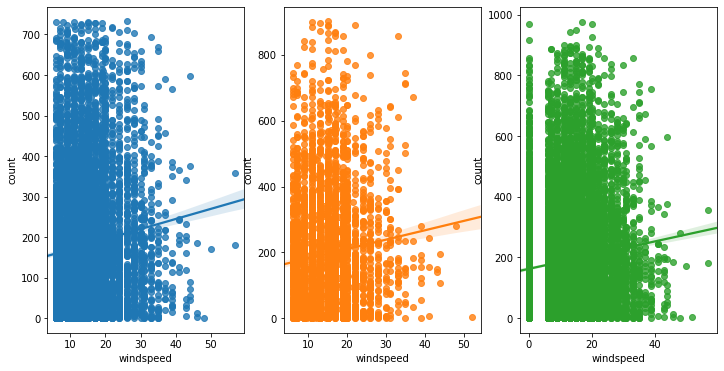

In [113]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 6)

sns.regplot(x = "windspeed", y = "count", data = X1, ax = ax1)

sns.regplot(x = "windspeed", y = "count", data = X2, ax = ax2)

sns.regplot(x = "windspeed", y = "count", data = bicycle, ax = ax3)

In [114]:
# windspeed 예측 : 랜덤포레스트
forest_Wind = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)
forest_Wind.fit(X_train_Wind_Not0,y_train_Wind_Not0)
print('훈련 세트 정확도 : {:.3f}'.format(forest_Wind.score(X_train_Wind_Not0,y_train_Wind_Not0)))
print('테스트 세트 정확도 : {:.3f}'.format(forest_Wind.score(X_test_Wind_Not0,y_test_Wind_Not0)))

훈련 세트 정확도 : 0.542
테스트 세트 정확도 : 0.284


In [115]:
# windspeed 예측 : 랜덤포레스트
forest_Wind = RandomForestRegressor(n_estimators=3000,max_depth=30,random_state=0)
forest_Wind.fit(X_train_Wind_Not0,y_train_Wind_Not0)
print('훈련 세트 정확도 : {:.3f}'.format(forest_Wind.score(X_train_Wind_Not0,y_train_Wind_Not0)))
print('테스트 세트 정확도 : {:.3f}'.format(forest_Wind.score(X_test_Wind_Not0,y_test_Wind_Not0)))

훈련 세트 정확도 : 0.911
테스트 세트 정확도 : 0.330


In [117]:
# 예측값을 랜덤포레스트로 예측 : train
Wind_pred_train_for = pd.Series(forest_Wind.predict(X_train_Wind_0),index=X_train_Wind_0.index)
X_train_Wind_0_for = pd.concat([Wind_pred_train_for,X_train_Wind_0],axis=1)
X_train_Wind_0_for = X_train_Wind_0_for.rename({0:'windspeed'},axis='columns')
X_train_Wind_Not0_for =  pd.concat([X_train_Wind_Not0,y_train_Wind_Not0],axis=1)
X_train_model_for = pd.concat([X_train_Wind_0_for,X_train_Wind_Not0_for],sort=True) 
y_train_model_for = X_train_model_for['count']
X_train_model_for = X_train_model_for.drop('count',axis = 1)

In [118]:
# 예측값을 랜덤포레스트로 예측 : test
Wind_pred_test_for = pd.Series(forest_Wind.predict(X_test_Wind_0),index=X_test_Wind_0.index)
X_test_Wind_0_for = pd.concat([Wind_pred_test_for,X_test_Wind_0],axis=1)
X_test_Wind_0_for = X_test_Wind_0_for.rename({0:'windspeed'},axis='columns')
X_test_Wind_Not0_for =  pd.concat([X_test_Wind_Not0,y_test_Wind_Not0],axis=1)
X_test_model_for = pd.concat([X_test_Wind_0_for,X_test_Wind_Not0_for],sort=True) 
y_test_model_for = X_test_model_for['count']
X_test_model_for = X_test_model_for.drop('count',axis = 1)

In [119]:
# windspeed 넣은 모델 예측 : 랜덤포레스트
forest_Wind_forest = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)
forest_Wind_forest.fit(X_train_model_for,y_train_model_for)
print('훈련 세트 정확도 : {:.3f}'.format(forest_Wind_forest.score(X_train_model_for,y_train_model_for)))
print('테스트 세트 정확도 : {:.3f}'.format(forest_Wind_forest.score(X_test_model_for,y_test_model_for)))

훈련 세트 정확도 : 0.816
테스트 세트 정확도 : 0.773


In [120]:
# windspeed 넣은 모델 예측 : 랜덤포레스트
forest_Wind_forest = RandomForestRegressor(n_estimators=3000,max_depth=30,random_state=0)
forest_Wind_forest.fit(X_train_model_for,y_train_model_for)
print('훈련 세트 정확도 : {:.3f}'.format(forest_Wind_forest.score(X_train_model_for,y_train_model_for)))
print('테스트 세트 정확도 : {:.3f}'.format(forest_Wind_forest.score(X_test_model_for,y_test_model_for)))

훈련 세트 정확도 : 0.987
테스트 세트 정확도 : 0.902


In [121]:
X3=pd.concat([X_train_model_for,y_train_model_for],axis=1)
X4=pd.concat([X_test_model_for,y_test_model_for],axis=1)

In [122]:
X1.windspeed.describe()

X3.windspeed.describe()

count    7510.000000
mean       14.261269
std         6.867709
min         6.003200
25%         8.998100
50%        12.998000
75%        18.471438
max        56.996900
Name: windspeed, dtype: float64

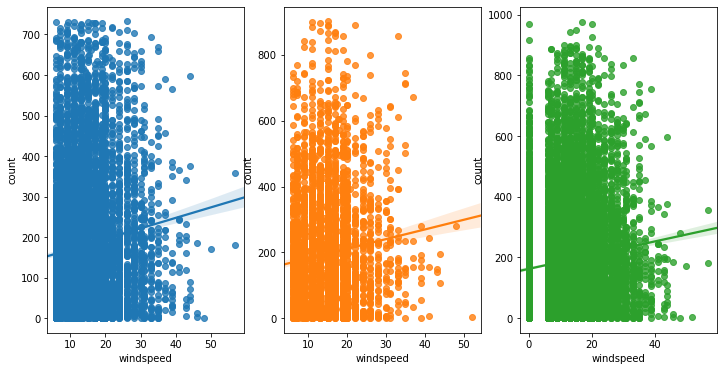

In [123]:
# 랜덤포레스트 예측값을 넣어준 windspeed
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 6)

sns.regplot(x = "windspeed", y = "count", data = X3, ax = ax1)

sns.regplot(x = "windspeed", y = "count", data = X4, ax = ax2)

sns.regplot(x = "windspeed", y = "count", data = bicycle, ax = ax3)